<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_Flood/blob/master/20200412_FEMA_DataDictionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Questions**


Are climate change effects disproportionally affecting poorer and minority communities?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title 
!pip install geopandas
import geopandas as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("bmh")

#**Description of the FEMA data**




**Q. What is the risk level by census block?**

**Q. How does it created**


#**Guidance for Flood Risk Analysis and Mapping: Flood Risk Assessments**

[(May, 2014)](https://www.fema.gov/media-library-data/1487007727386-edebe467524dd8774a206632c290c98b/Flood_Risk_Assessment_Guidance_May_2014.pdf): Shapefile used in here is based on 2014 data. The below information is cited from this report.

[(May, 2016)](https://www.fema.gov/media-library-data/1541174026104-5849e5bb34730fdadabc5faa331e1b7f/Flood_Risk_Assessment_Guidance_May_2016_SUPERSEDED.pdf): Updated version. Some information and figure are cited from this report.


The Flood Risk Assessment dataset reflects potential loss estimates (damages) resulting from floods of various magnitudes based on the frequency with which they are projected to occur. These loss estimates can be estimated at the **individual building/structure level or aggregated to US Census block areas**. Flood Risk Assessment loss estimates generally vary by structure type (residential, commercial, industrial, etc.) and are based on a relationship between flood depth and the associated percentage of damage for each structure type. Therefore, a flood risk assessment can commonly be estimated for typical **building types for any flood event, flood scenario, or flood frequency** analyzed where flood depth information is available. As outlined in the Flood Risk Database Technical Reference, the Flood Risk
Assessment dataset consists of several spatial and lookup tables that communicate the overall flood risk exposure and damage estimates within the project area. 

Included within the Flood Risk Assessment dataset are tables associated with the following: 
*   Loss estimates from the 2010 Hazus Average Annualized Loss (AAL) Study
*  “Refined” loss estimates for new or updated flood study reaches, at either the census block or individual structure level; typically these will be based on depth grids from the Flood Depth and Analysis Grids dataset 
*   For projects where the Refined analyses were calculated and aggregated at the census block level, a “Composite” table of the AAL and Refined data, which represents the best available flood risk results 


Additional tables that summarize inventory and loss data at the community level and within the overall Flood Risk Project area are also considered part of the Flood Risk Assessment dataset. The inventory data within the Flood Risk Assessment dataset are based on estimates of total inventory values for building and contents replacement values. These replacement values
typically are used by loss estimation models, such as Hazus, to derive loss values. Losses can be estimated for three general categories as follows: 


*   **Building losses** are those losses associated with damage to the fixed elements of a structure, such as the foundation, walls, or floors.
*   **Contents losses** are those losses associated with damage to structural elements not permanently fixed within a structure, such as furniture, appliances, and personal possessions.
*   **Business Disruption losses**  are additional losses not included in the building and contents losses, most commonly associated with businesses. These losses can include the costs of temporary displacement or disruption while flood repairs are being performed. It can also include business losses during the disruption. From Hazus, business disruption costs should include the sum of Inventory Loss, Relocation Cost, Income Loss, Rental Income Loss, Wage Loss, and Direct Output Loss. 

In addition to these three categories of loss, the Flood Risk Assessment dataset also provides loss estimates divided into three categories of building use or general occupancy. The three categories of general occupancy to be used for the Flood Risk Assessment dataset are as follows:

*   **Residential occupancy** as defined by Hazus, including single family dwellings, mobile homes, apartment buildings, and dormitories
*   **Commercial occupancy** as defined by Hazus, including retail and wholesale trade,repair services, banks and hospitals
*   **Other occupancy** not included in Residential or Commercial occupancy as defined by Hazus, which include Hazus occupancy categories of industrial, agricultural, education, religious, and government structures 

Flood risk assessments, whether estimated at the structure level, or aggregated at the census block level, are most commonly performed by **calculating the flood losses/damages at a given depth of flooding**.


The **Hazus Flood Model User Manual (August 2018) provides details on how census block-based and UserDefined Facility (UDF) risk assessments can be performed within Hazus**, which has published depth-damage relationships already built into the software. General information regarding **the creation of flood depth grids can also be found in the [Flood Depth and Analysis Grids Guidance (May 2014) document**. (*Please see the Note section below*) 

Flood risk assessments performed for a Flood Risk Project will utilize the best available depth grids to calculate the loss estimates that are stored within the Flood Risk Database (FRD). Depending on the type and coverage of available depth grids within the project area, this prerisk assessment process involves the creation of a “composite” depth grid for each flood frequency being analyzed. Each composite flood risk assessment depth grid is then used within Hazus (or similar) software to perform a risk analysis and estimate flood losses. 

###**Census Block-based Flood Risk Assessments**

Flood loss data calculated within Hazus can be aggregated and reported at the census tract (largest) and census block (smallest) level (see Figure 2). Of the two, the Flood Risk Database (FRD) has been designed to have its risk assessment data delivered at the census block level. To determine flood losses, the census block-based approach in Hazus applies a weighting
methodology to assume a uniform distribution of census demographics and structures across the census block. As such, this type of approach generally produces conservative loss estimates (often overestimating what the true losses might be). 


the Flood Risk Database (FRD) has been designed to have its risk assessment data delivered at the census block level To determine flood losses, **the census block-based approach in Hazus** applies a weighting
methodology to assume a uniform distribution of census demographics and structures across the census block geometry. As such, this type of approach generally produces conservative loss estimates (often overestimating what the true losses might be). However, beginning with Hazus version 2.2 SP1, the Hazus model provides **two types of census block data**.

The first type, **homogenous census blocks**, represents the “full’ census blocks traditionally used for risk assessment where only open water areas have been clipped out of the original census block boundaries from the US Census Bureau.

The second type, **dasymetric census blocks**, have had additional “undeveloped” land areas clipped out of the original census block boundaries based on **Land Use-Land Cover (LULC)** data from the USGS. With the assistance of the U.S. Army Corp of Engineers Flood Impact Assessment Team (USACE FIA), the Hazus Census Blocks were clipped to remove areas identified as water, wetlands and forest. 


###**Flood Risk Database (FRD) Related Guidance for Census Block-based Risk Assessments** 

For census block-based flood risk assessments, the Flood Risk Assessment dataset is made up of the following tables in the FRD:
*   **S_CenBlk_Ar (Chapter 4)**
*   L_RA_Results
*   L_Exposure
*   L_RA_Summary
*   L_Local_GBS (only populated if local General Building Stock data was updated and used in Hazus to perform a census block-based flood risk assessment) Additional guidance on these tables is found in the sections below. 

**S_CenBlk_Ar**
The census block polygons in S_CenBlk_Ar should not be clipped to the project area footprint (S_FRD_Proj_Ar). It relates to aligning it to the footprint of the project area. As the first step towards populating the Hazus-derived fields in S_CenBlk_Ar, Table 1 outlines the tables that should be exported from Hazus:

![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbEzYJv%2FbtqDBzpSy18%2FYECAaqvcsZeF5wi8LhS6xk%2Fimg.jpg)

Once that has been complete, Table 2 explains how the values in the S_CenBlk_Ar building and contents fields are derived from these exported Hazus tables. Each census block within the project area should be populated with this information. All attributes that report dollar values and losses (e.g. ARV_BG_TOT, ARV_CN_TOT, etc.) should have their whole dollar values populated, rather than reported in thousands of dollars. All losses less than $100,000 should be rounded to the nearest $10,000 in these fields. All losses greater than $100,000 should be rounded to the nearest $100,000. 

**(Additional) Dataset Spatial Extents**

The Flood Risk Assessment dataset should include all census blocks that are entirely or partially within the Flood Risk Project area boundary (or project footprint). The spatial census block table (S_CenBlk_Ar) should be kept in its entirety and should not be clipped to the project footprint. However, some of the FRD tables that are used to populate the FRR should not include data outside of the project footprint. For example, the L_Exposure and L_RA_Summary
tables will include inventory and loss data summarized at the overall Flood Risk Project area level. Since census block boundaries rarely align perfectly with watershed, coastal, or other project footprints, these result tables will need to be area-weighted. 

In order to derive appropriate loss values and summaries at the project level, **the loss values for any census block that extends outside of the project footprint should be area-weighted**. This is accomplished by intersecting census block boundaries with the project area boundary to derive the percent of the census block that is within the project area. This percentage is then multiplied by the values represented by the census block (such as total asset loss) to derive the values that apply to the overall project area.

Similar area-weighting principles will need to be applied for the community summary records in L_Exposure and L_RA_Summary. Figure 10 shows an example of how a community (City A) is split between three different project areas (watersheds). When City A’s information is shown in the FRD, FRR, and FRM for Sub-basin 1 (the project footprint), only the risk assessment results for the portion of the community within Sub-basin 1 would be included (the red portion of City A). 


**Annualized Loss Calculations**

Whether calculated structure-by-structure, or aggregated at the census block level, annualized losses are helpful when comparing the magnitude or impacts of one hazard against another,and in estimating the potential flood losses over a defined period of time. For census blocks where losses for all five flood events were not analyzed, it may not be appropriate to calculate
the annualized losses; however, that decision should be made in consultation with the FEMA Regional Project Officer, depending on the flood events that were modeled. Although current and/or future versions of Hazus may have the ability to calculate annualized flood losses from within the software directly, the annualized loss formula is included below. This formula should be used individually for every loss calculation, such as residential structure
losses or commercial contents losses. 

May 2014 ver

![(May 2014 ver)](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FHg3Wx%2FbtqDBAvyO0A%2F8Jn4NmKbI0oCqASy62eZ6K%2Fimg.jpg)

May 2016 ver

![(May 2016 ver)](https://k.kakaocdn.net/dn/pAgY3/btqDx6v97kI/wABR0K2bPN3zIej31z9be1/img.jpg)


**Variations for Coastal Flooding**

Since flood risk assessments generally rely on the availability of depth grids, refined analyses for coastal studies are limited to **the percent annual chance floods** for which depth grids were produced as part of the flood study. This is usually only **the 1% annual chance flood**, although if the depth grids for other frequencies were able to be produced, a corresponding flood risk assessment can be produced. 




#**Other reports**


**Flood Risk Database Guidance**

[FRD Guidance (May 2014)](https://www.fema.gov/media-library-data/1481150525899-160969c5620e3e1c16c0e728cb9bd2be/FRD_Guidance_May_2014.pdf) 

**Flood Risk Assessment Information on the Flood Risk Map**

[FRM Guidance (May 2014)](https://www.fema.gov/media-library-data/1481150720192-49259fed6a8ad4cfe70f203cce9bab57/FRM_Guidance_May_2014.pdf) 

[FRM Guidance (Feb 2018)](https://www.fema.gov/media-library-data/1520966727438-8c05ecc18e141449aa79665641bd9fe3/Flood_Risk_Map_Guidance_Feb_2018.pdf) 

**Flood Risk Assessment Information in the Flood Risk Report**

[FRR Guidance (May 2014)](https://www.fema.gov/media-library-data/1481150860294-9420484e24fc09f0370a14cee0a4c51e/FRR_Guidance_May_2014.pdf) 





#**NOTE**

####**The Hazus Flood Model User Manual**

The [Hazus Flood Model User Manual](https://www.fema.gov/media-library-data/1564766454464-d77d2c219be0f54315aa79ac5dbc3547/Hazus_4-2_Flood_User_Manual_August_2019.pdf) (August 2018)

![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/9916F94D5E9DA3500F)
![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/9944834D5E9DA35115)

The Hazus Flood Model analyzes both **riverine and coastal flood hazards**. Flood hazard is defined by a relationship between depth of flooding and the annual chance of inundation to that depth.

Depth, duration, and velocity of water in the floodplain are the primary factors contributing to flood losses. Other hazards associated with flooding that contribute to flood losses include channel erosion and migration, sediment deposition, bridge scour, and the impact of flood-borne debris. The Hazus Flood Model allows users to estimate **flood losses from depth of flooding**. The agriculture component will allow the user to estimate a range of losses to account for flood duration. The Flood Model does not estimate the losses due to high-velocity flash floods.

In different contexts, flood hazard may have different meanings. Hazard can mean risk in some contexts and it can mean a source of danger in others. The hazard may be that an area is inundated about once every 10 years (risk) or it may be that an area is subject to **flood depths ranging from 5 to 10 feet (source of danger)**. Flood frequency studies combine these ideas and
define flood hazard in terms of the chance that a certain magnitude of flooding is exceeded in any given year.
**Flood magnitude** is usually measured as a discharge value, flood elevation, or depth. For example, flood magnitude may be referred to as the **100-year flood elevation**, which is the elevation, at the point of interest, that has a 1 percent annual chance of being exceeded by floodwater. Using the flood frequency convention, flood hazard is defined by a relation between depth of flooding and the annual chance of inundation greater than that depth. The relation is called a depth-frequency curve. 


####**Flood Depth and Analysis Grids Guidance (May 2014)**

[May 2014 ver.](https://www.fema.gov/media-library-data/1541174026098-5849e5bb34730fdadabc5faa331e1b7f/Flood_Depth_and_Analysis_Grids_Guidance_May_2014_SUPERSEDED.pdf) 

[February 2018 ver.](https://www.fema.gov/media-library-data/1523562952942-4c54fdae20779bb004857f1915236e6c/Flood_Depth_and_Analysis_Grids_Guidance_Feb_2018.pdf)

**Grid Cell**

The overall file size of each grid dataset is directly related to the size of the grid cells selected.
For example, the decision to use a **1 meter resolution grid** as opposed to a 3 meter resolution grid will approximately increase the file size on disk by a factor of 9 (nine 1m x 1m grid cells can fit within one 3m x 3m grid cell). Using very small cell sizes (smaller than 1m resolution), however, may result in a flood risk database that is difficult for most users to be able to access
and use. 

#**Shapefile**

[FEMA Flood Map Service Center](https://msc.fema.gov/portal/advanceSearch#searchresultsanchor)

*   10001C: Kent County
*   10003C: New Castle County
*   10005C: Sussex County

[Flood Risk Database (FRD) Technical Reference](https://www.fema.gov/media-library-data/1487007946311-cb6e591fc9336cf138ae89b59df8349c/Flood_Risk_Database_Technical_Reference_May_2016.pdf) (May 2016)

It should be noted that reasons for the floodplain and floodway changes (also known as Contributing Engineering Factors) are intended to give the user a general sense of what caused the change, as opposed to providing a reason for each and every area of change.

The Flood Risk Database (FRD) is the key product that will support all other flood risk products. It is a database of non-regulatory flood risk data which contains the digital data used to prepare the Flood Risk Report (FRR) and Flood Risk Map (FRM), as well as other ancillary data generated during a Flood Risk Project.

The FRD tables prefixed with “S_” have a spatial component associated with them. The tables that begin with “L_” are tabular (often referred to as a look-up or business tables); there is no direct spatial component included in these tables. The spatial tables (feature
classes) also have a suffix describing the type of feature contained within the table. These include a) _Ar (for polygonal areal features), b) _Ln (for linear features) and c) _Pt (for point features).

*   **“S_”** have a spatial component associated with them
*   **“L_”** are tabular (often referred to as a look-up or business tables)
*   **_Ar** (for polygonal areal features)
*   **_Ln** (for linear features)
*   **_Pt** (for point features)


**Data Collection Questions**

**Question1**: Do we need to use dbf file if necessary? 

**Question2**: What kind of geospatial dataset do we have to use? 

**Question3**: Shapefile is based on May 2-16, 2014. Are we going to see the time series of the economic-social factors? That means, do I have to find one year or five year income database in ACS?

##**1) S_CSLF_Ar**

**S_CSLF_Ar: Changes Since Last FIRM (CSLF) polygons depicting
areas of change between new and previous flood hazards**

This polygon feature class depicts the **changes in spatial extents between the previous and newly revised the Flood Insurance Rate Maps (FIRMs)**. It is required to be populated when the **Changes Since Last FIRM (CSLF)** dataset is produced. If the CSLF polygon spans FIRM panels that have different effective dates, then those polygons should be divided at the panel boundaries. This feature class is linked to the FRD_Model_Info table by the NEW_MODEL and PRE_MODEL fields allowing the user to easily find which models were associated with the CSLF polygons. The feature class is also related to the L_SourceCit table by the PRE_SRCCIT, NEW_SRCCIT and SOURCE_CIT fields to document the previous and current FIRM databases used to develop the CSLF. Although a formal relationship class cannot exist to a different database, the feature class is associated with the Coordinated Needs Management Strategy (CNMS) data using the CNMS_ID field.

(543403.2608200095, 773011.8887737499, 139673.58238379174, 684050.7173478131)

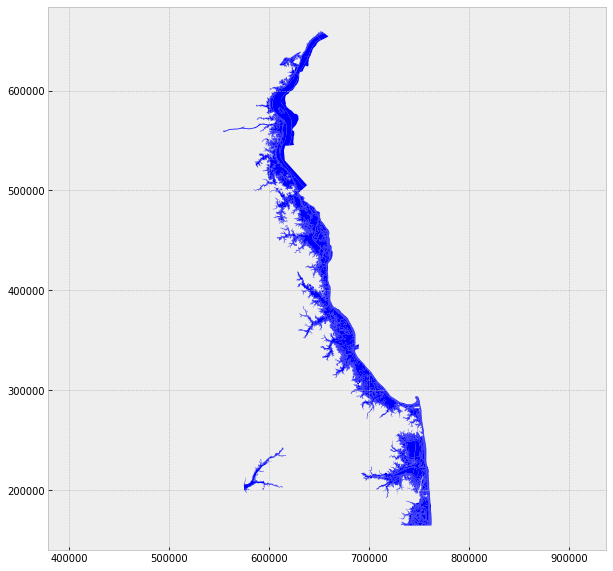

In [ ]:
#@title Map of the "S_CSLF_Ar" 
# Merge counties (Kent + New Castle + Sussex)
kent1 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Kent county/FRD_10001C_Coastal_ShapeFiles_20140502/S_CSLF_Ar.shp")
ncastle1 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/New castle county/FRD_10003C_Coastal_ShapeFiles_20140516/S_CSLF_Ar.shp")
sussex1 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Sussex county/FRD_10005C_Coastal_ShapeFiles_20140509/S_CSLF_Ar.shp")
fnames1 = [kent1, ncastle1, sussex1]
scslfar = pd.concat(fnames1)

# Plot 
fig, ax = plt.subplots(figsize=[10,10])
scslfar.plot(ax=ax)
ax.axis("equal")

In [ ]:
scslfar.head()

,CSLF_ID,CNMS_ID,AREA_SF,PRE_ZONE,PRE_ZONEST,PRE_MODEL,PRE_TOPO,PRE_SRCCIT,NEW_ZONE,NEW_ZONEST,NEW_MODEL,NEW_TOPO,NEW_SRCCIT,PEAKDSCHG,MDLMETHODS,FLD_CTRLCH,HYDSTRCHG,TOPOCHG,SEDCHG,EROSIONCHG,CHANNELCHG,LEVEECHG,RUNOFFCHG,DUNECHG,OTHCHG,SFHACHG,FLDWYCHG,NONSFHACHG,CHHACHG,STRUCTURES,POPULATION,CID,HUC8_CODE,CASE_NO,VERSION_ID,SOURCE_CIT,Shape_Leng,Shape_Area,D_PRE_ZONE,D_PREZONST,D_PRE_TOPO,D_NEW_ZONE,D_NEWZONST,D_NEW_TOPO,D_PEAKDSCH,D_MDLMETH,D_FLDCTRC,D_HYDSTRC,D_TOPOCHG,D_SEDCHG,D_EROSCHG,D_CHNNLCHG,D_LEV_CHG,D_RNOFFCHG,D_DUNECHG,D_SFHACHG,D_FLDWYCHG,D_NONSFHA,D_CHHACHG,geometry,Shape_Le_1
0,22573,NP,401.900991,AE,0100,1,NP,FIRM1,X,0520,2,3010,FIRM2,U,T,U,U,T,U,U,U,U,U,U,None,D,Z,Z,None,-9999,-9999.0,100001,02040207,11-03-1392S,2.3.2.1,STUDY1,280.079305,401.893638,AE,COASTAL,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD CONTAINED I...,LiDAR 18.5 cm RMSEz,Unknown,True (Yes),Unknown,Unknown,True (Yes),Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Decrease,None (Zero),None (Zero),None,"POLYGON ((624438.135 486381.706, 624432.470 48...",NaN
1,22574,NP,8354.813883,AE,0100,1,NP,FIRM1,X,0520,2,3010,FIRM2,U,T,U,U,T,U,U,U,U,U,U,None,D,Z,Z,None,-9999,-9999.0,100001,02040207,11-03-1392S,2.3.2.1,STUDY1,376.546780,8354.830671,AE,COASTAL,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD CONTAINED I...,LiDAR 18.5 cm RMSEz,Unknown,True (Yes),Unknown,Unknown,True (Yes),Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Decrease,None (Zero),None (Zero),None,"POLYGON ((633829.449 451279.496, 633828.317 45...",NaN
2,22575,NP,29.411329,AE,0100,1,NP,FIRM1,X,0520,2,3010,FIRM2,U,T,U,U,T,U,U,U,U,U,U,None,D,Z,Z,None,-9999,-9999.0,100001,02040207,11-03-1392S,2.3.2.1,STUDY1,45.150313,29.411506,AE,COASTAL,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD CONTAINED I...,LiDAR 18.5 cm RMSEz,Unknown,True (Yes),Unknown,Unknown,True (Yes),Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Decrease,None (Zero),None (Zero),None,"POLYGON ((633753.983 451138.048, 633773.810 45...",NaN
3,22576,NP,1216.023983,AE,0100,1,NP,FIRM1,X,0520,2,3010,FIRM2,U,T,U,U,T,U,U,U,U,U,U,None,D,Z,Z,None,-9999,-9999.0,100001,02040207,11-03-1392S,2.3.2.1,STUDY1,232.978169,1216.026589,AE,COASTAL,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD CONTAINED I...,LiDAR 18.5 cm RMSEz,Unknown,True (Yes),Unknown,Unknown,True (Yes),Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Decrease,None (Zero),None (Zero),None,"POLYGON ((633639.432 451095.263, 633741.047 45...",NaN
4,22577,NP,30341.379024,AE,0100,1,NP,FIRM1,X,0520,2,3010,FIRM2,U,T,U,U,T,U,U,U,U,U,U,None,D,Z,Z,None,-9999,-9999.0,100001,02040207,11-03-1392S,2.3.2.1,STUDY1,816.611102,30341.372881,AE,COASTAL,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD CONTAINED I...,LiDAR 18.5 cm RMSEz,Unknown,True (Yes),Unknown,Unknown,True (Yes),Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Decrease,None (Zero),None (Zero),None,"POLYGON ((639527.964 444718.786, 639495.379 44...",NaN


*   **CSLF_ID**: CLSF Identifier. User-defined Primary Key / Unique Identifier. This
field should be sequentially numbered for all records in the table.  
*   **CNMS_ID**: CNMS Identifier. Foreign Key to S_Studies_Ln feature class in the
CNMS Database. This identifier is composed of the 5-digit county
FIPS code, ‘01’ indicating the S_Studies_Ln feature class, and a 5-
digit unique sequential number. 
*   **AREA_SF**: Area of the change polygon, measured in square feet in the local projection.  
*   **PRE_ZONE**: Previous Flood Zone Designation . This is the flood zone
designation from the previous, effective FIRM. Uses D_Zone
domain. 
*   **PRE_ZONEST**: Previous Flood Zone Subtype Designation. This is the designation
from the previous, effective FIRM. Uses D_ZoneSubtype domain
*   **PRE_MODEL**: Models used for previous, effective FIRM. This is a foreign key to the FRD_Model_Info table. 
*   **PRE_TOPO**: Topographic Type used for previous delineation. Uses
D_Topo_Typ domain. 
*   **PRE_SRCCIT**: Source Citation for previous FIRM. This is a foreign key to the L_Source_Cit table. 
*   **NEW_ZONE**: New Flood Zone Designation. This is the flood zone designation
from the current project. Uses D_Zone domain. 
*   **NEW_ZONEST**: New Flood Zone Subtype Designation. This is the flood zone
designation from the current project. Uses D_ZoneSubtype domain.
*   **NEW_MODEL**: Models used for new delineation. This is a foreign key to the
FRD_Model_Info table. 
*   **NEW_TOPO**: Topographic Type used for new delineation. Uses D_Topo_Typ
domain.
*   **NEW_SRCCIT**: Source Citation for new FIRM. This is a foreign key to the
L_Source_Cit table. 
*   **PEAKDSCHG**: Peak Discharge Change. The change to the study’s peak
discharges that may have impacted analysis (e.g., Increase/Decrease/Negligible/ Unknown) [aka, CNMS element C2]. Uses D_Change domain. This is an enhanced field. 
*   **MDLMETHODS**: Model Methods Change. The presence of significant changes to
primary assumptions associated with the updated model methodology since last the last study (e.g., True/False/Unknown) [aka, CNMS element C3]. Uses
D_TrueFalse domain. This is an enhanced field. 
*   **FLD_CTRLCH**: Flood Control Structures Change. The change to the study’s major flood control structure(s) that may have impacted analysis since
the last study (e.g., Increase/Decrease/Negligible/ Unknown). [aka,
CNMS element C4]. Uses D_Change domain. This is an enhanced
field.
*   **HYDSTRCHG**: Hydraulic Structures Change. The change to the study’s number of hydraulic structures that may have impacted analysis since the last
study (e.g., Increase/Decrease/Negligible/ Unknown). [aka, CNMS element C6 & S4]. Uses D_Change domain. This is an enhanced field. 
*   **TOPOCHG**: Topography Change. The change in the underlying topography
used for mapping the floodplain may have impacted the analysis since the last study (e.g., True/False/Unknown). Uses D_TrueFalse domain. This is an enhanced field.  
*   **SEDCHG**: Sediment Change. The presence of significant changes to channel
sedimentation since last the last study (e.g., True/False/Unknown)
[aka, CNMS element C7]. Uses D_Change domain. This is an enhanced field. 
*   **EROSIONCHG**: Erosion Change. The presence of significant changes to channel erosion or scour since last the last study (e.g., True/False/Unknown) [aka, CNMS element C7]. Uses D_Change domain. This is an enhanced field.
*   **CHANNELCHG**: Channel Change. The presence of significant changes to channel geometry since last the last study (e.g., True/False/Unknown) [aka,
CNMS element C5 & S5]. Uses D_TrueFalse domain. This is an enhanced field. 
*   **LEVEECHG**: Levee Change. The change in the levee status or modeling
parameters/scenario for the levee may have impacted the analysis since the last study (e.g., True/False/Unknown). Uses D_TrueFalse domain. This is an enhanced field.
*   **RUNOFFCHG**: Runoff Change. The change to the study’s runoff characteristics due landuse, vegetation or imperviousness changes that may have
impacted analysis (e.g., Increase/Decrease/Negligible/Unknown) [aka, CNMS elements S3 & S7]. Uses D_Change domain. This is an enhanced field. 
*   **DUNECHG**: Dune Change. The presence of significant changes to frontal
dunes since last the last study (e.g., True/False/Unknown) [aka, CNMS element S8]. Uses D_Change domain. This is an enhanced field. 
*   **OTHCHG**: Other Changes. The description of other changes the Mapping
Partner believes to have contributed to the results of the analysis. This is an enhanced field. 
*   **SFHACHG**: SFHA Change. The type of SFHA change for each CSLF polygon
based upon previous and new flood zones (i.e., does this polygon indicate an Increase/Decrease/Zero change in the SFHA). Uses D_Change domain.
*   **FLDWYCHG**:Floodway Change. The type of floodway change for each CSLF
polygon based upon previous and new flood zones (i.e., does this polygon indicate an Increase/Decrease/Zero change in the floodway area). Uses D_Change domain. 
*   **NONSFHACHG**: Non-SFHA Change. The type of non-SFHA change for each CSLF
polygon based upon previous and new flood zones (i.e., does this polygon indicate an Increase/Decrease/Zero change in the nonSFHA area). Uses D_Change domain
*   **CHHACHG**: Increase or decreases in the SFHA in coastal communities that
have been newly added into, or removed from, the coastal high hazard areas (VE or V Zones). This field is not meant to capture changes in V zone elevations (e.g. VE10 to VE12, VE9 to VE8, etc.). Uses D_Change domain. 
*   **STRUCTURES**: The estimated count of affected structures within the area of change. This is an enhanced field. 
*   **POPULATION**: The estimated affected population within the area of change. This is an enhanced field. 
*   **CID**: This is the six-digit CID assigned by FEMA in which this CSLF
polygon lies. See the definition in S_FRD_Pol_Ar for more detail. If
the CSLF polygon does not lie in an area covered by a FEMA community identifier, this field shall be populated with a null value.
*   **HUC8_CODE**: WBD 8-digit Hydrologic Unit Code for the sub-basin in which the CSLF polygon feature lies. If a feature crosses a HUC-8 boundary, the field shall be populated with the HUC-8 value in which the majority of the feature lies. 
*   **CASE_NO**:FEMA Case Number. See the CASE_NO field in S_FRD_Proj_Ar
for more detail. 
*   **VERSION_ID**:Version Identifier. Identifies the product version and relates the feature to standards according to which it was created. 
*   **SOURCE_CIT**: Source Citation from L_SOURCE_CIT. See field definition in
L_Source_Cit for more detail. This field should be populated with
the SOURCE_CIT for the current Flood Risk Project. 
*   **Shape_Leng**: Internal field used by ArcGIS software to store the length of the feature’s geometry. 
*   **Shape_Area**:Internal field used by ArcGIS software to store the area of the feature’s geometry


NOTE: The CSLF dataset identifies changes in the Special Flood Hazard Area (SFHA) and floodway boundary changes since the previous FIRM was developed. These datasets quantify land area increases and decreases to the SFHA and floodway, as well as areas where the flood zone designation has changed.

The CSLF dataset is created in areas that were previously mapped using
digital FIRMs. The CSLF dataset for a project area may include some or
all of the following:
*   Floodplain and/or Floodway Boundary Changes: Any changes to the
existing floodplain or floodway boundaries are depicted
*   Floodplain Designation Changes: This includes changed floodplain
designations (e.g., Zone A to Zone AE).

CSLF Information: Within this dataset additional information is
provided to help explain the floodplain and floodway boundary
changes shown on the FIRM. This information is stored as digital
attributes within the CSLF polygons and may include some or all of
the following:
*   Changes in peak discharges
*   Changes to the modeling methodology (e.g., tide gage analysis)
*   New flood control structures (e.g., dams, levees, etc.)
*   Changes to hydraulic structures (e.g., bridges, culverts, etc.)
*   Sedimentation and/or Erosion
*   Man-made changes to a watercourse (e.g., realignment or
improvement)

##**2) S_Carto_Ar**
**S_Carto_Ar (Spatial): Polygons used for cartographic representations only on the Flood Risk Map**

This polygon feature class is used to provide a **cartographic background for the Flood Risk Map (FRM)**. The features contained in the feature class are primarily large hydrographic areas that are best represented as polygons and polygons representing the **restudy areas and significant cultural features** (e.g., parks, military bases, national forests, etc.). Other potential features include the portions of communities that lie outside of the S_FRD_Proj_Ar polygon to allow **the entire community area to be displayed in the project locator inset on the FR**M. This feature class is required to be populated when displaying additional polygon cartographic features on the FRM.

(-891559.4038289759,
 1572644.7742160682,
 -541727.0138346021,
 1780841.5326528687)

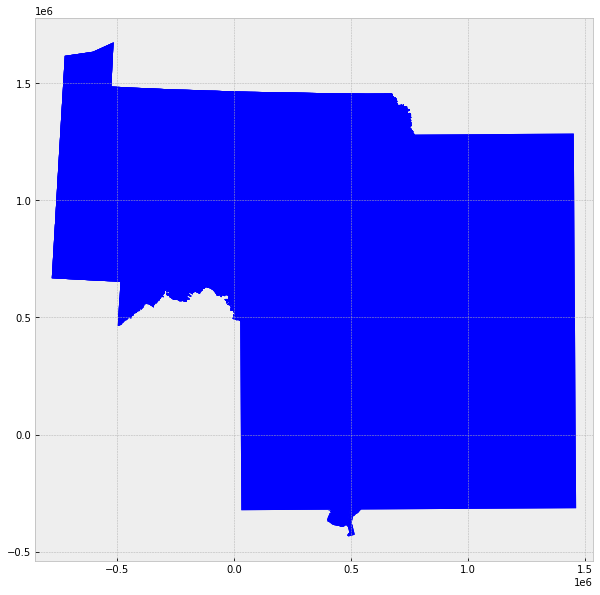

In [ ]:
#@title Map of the "S_Carto_Ar"
# Merge counties (Kent + New Castle + Sussex)
kent2 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Kent county/FRD_10001C_Coastal_ShapeFiles_20140502/S_Carto_Ar.shp")
ncastle2 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/New castle county/FRD_10003C_Coastal_ShapeFiles_20140516/S_Carto_Ar.shp")
sussex2 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Sussex county/FRD_10005C_Coastal_ShapeFiles_20140509/S_Carto_Ar.shp")
fnames2 = [kent2, ncastle2, sussex2]
scartoar = pd.concat(fnames2)

# Plot 
fig, ax = plt.subplots(figsize=[10,10])
scartoar.plot(ax=ax)
ax.axis("equal")

In [ ]:
scartoar.head()

,CART_AR_ID,F_TYPE,F_CODE,NAME,HUC8_CODE,CASE_NO,VERSION_ID,SOURCE_CIT,SHAPE_Leng,SHAPE_Area,D_F_TYPE,D_F_CODE,geometry,Shape_Le_1,Shape_Area
0,1,400,-8888,"Kent County, DE Coastal Study",NP,11-03-1392S,2.3.3.2,STUDY1,2.817972e+06,2.948967e+09,Coastal Surge Influence Area,-8888,"MULTIPOLYGON (((653361.109 343966.587, 653221....",NaN,NaN
1,4,900,-8888,PolAr TOWN OF KENTON,02040207,11-03-1392S,2.3.3.2,FIRM2,9.884473e+03,4.669395e+06,User-Defined,-8888,"POLYGON ((585473.163 448437.132, 586827.251 44...",NaN,NaN
2,5,900,-8888,PolAr TOWN OF HARTLY,02060005,11-03-1392S,2.3.3.2,FIRM2,8.618637e+03,1.558773e+06,User-Defined,-8888,"POLYGON ((572426.935 425749.719, 572909.273 42...",NaN,NaN
3,6,900,-8888,PolAr TOWN OF LEIPSIC,02040207,11-03-1392S,2.3.3.2,FIRM2,1.189404e+04,9.010659e+06,User-Defined,-8888,"POLYGON ((628498.168 450951.722, 628431.951 45...",NaN,NaN
4,7,900,-8888,PolAr TOWN OF LITTLE CREEK,02040207,11-03-1392S,2.3.3.2,FIRM2,1.099084e+04,2.843703e+06,User-Defined,-8888,"POLYGON ((647799.234 422256.309, 647710.178 42...",NaN,NaN



*   **OBJECTID**: Object Identifier. Internal Primary Key used by ArcGIS software to
provide unique access to each record. 
*   **SHAPE**: Shape Geometry Field. Internal field used by ArcGIS software to
store the feature geometry. 
*   **CART_AR_ID**: Cartographic Area Identifier. User-defined Primary Key / Unique Identifier. This field should be sequentially numbered for all records
in the table. 
*   **F_TYPE**: Feature Subtype for symbolization. Uses D_Carto_Typ.
*   **F_CODE**: Feature Code for symbolization. Uses D_Carto_Hydro_Code.
*   **NAME**: Feature Name use for labeling on the FRM. This should be the
name for the body of water or other feature name.
*   **HUC8_CODE**: WBD 8-digit Hydrologic Unit Code (HUC) for the sub-basin in which the feature lies. If the feature crosses a HUC-8 boundary, the field shall be populated with the HUC-8 value in which the majority of the feature lies. 
*   **CASE_NO**: FEMA Case Number. See the CASE_NO field in S_FRD_Proj_Ar
for more detail.
*   **VERSION_ID**: Version Identifier. Identifies the product version and relates the feature to standards according to which it was created.
*   **SOURCE_CIT**: Source Citation from L_SOURCE_CIT. See field definition in
L_Source_Cit for more detail.
*   **SHAPE_LENGTH**: Internal field used by ArcGIS software to store the length of the feature’s geometry. 
*   **SHAPE_AREA**: Internal field used by ArcGIS software to store the area of the feature’s geometry. 



##**3) S_Carto_Ln**

**S_Carto_Ln (Spatial): Lines used for cartographic representations only on the
Flood Risk Map**  

This polyline feature class is used to provide **a cartographic background for the FRM**. The features contained in the feature class are primarily **streams and transportation features** (i.e., roadways). This feature class is required to be populated when displaying additional polyline cartographic features on the FRM. 

(-872654.6987086716,
 1175645.9666896793,
 -116074.42916706316,
 1760572.3619544145)

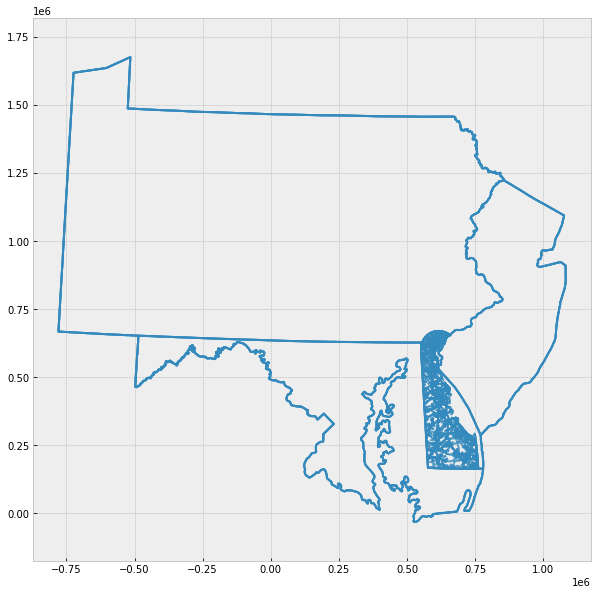

In [ ]:
#@title Map of the "S_Carto_Ln"
# Merge counties (Kent + New Castle + Sussex)
kent3 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Kent county/FRD_10001C_Coastal_ShapeFiles_20140502/S_Carto_Ln.shp")
ncastle3 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/New castle county/FRD_10003C_Coastal_ShapeFiles_20140516/S_Carto_Ln.shp")
sussex3 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Sussex county/FRD_10005C_Coastal_ShapeFiles_20140509/S_Carto_Ln.shp")
fnames3 = [kent3, ncastle3, sussex3]
scartoln = pd.concat(fnames3)

# Plot 
fig, ax = plt.subplots(figsize=[10,10])
scartoln.plot(ax=ax)
ax.axis("equal")

In [ ]:
scartoln.head()

,CART_LN_ID,F_TYPE,F_CODE,NAME,HWY_NUM,HUC8_CODE,CASE_NO,VERSION_ID,SOURCE_CIT,SHAPE_Leng,D_F_TYPE,D_F_CODE,geometry
0,1,200,300,State Highway 11,11,02060002,11-03-1392S,2.3.3.2,FIRM2,14686.014127,Transportation,State Highways,"LINESTRING (571999.890 425743.142, 572042.757 ..."
1,2,200,300,State Highway 302,302,02060005,11-03-1392S,2.3.3.2,FIRM2,29.724568,Transportation,State Highways,"LINESTRING (562257.636 416572.444, 562282.392 ..."
2,3,200,300,State Highway 317,317,02060005,11-03-1392S,2.3.3.2,FIRM2,2.347261,Transportation,State Highways,"LINESTRING (567553.384 326279.894, 567551.063 ..."
3,4,200,300,State Highway 1,1,02040207,11-03-1392S,2.3.3.2,FIRM2,204712.705233,Transportation,State Highways,"MULTILINESTRING ((657173.279 337205.792, 65680..."
4,5,200,300,State Highway 10,10,02040207,11-03-1392S,2.3.3.2,FIRM2,84757.113816,Transportation,State Highways,"MULTILINESTRING ((604550.072 394162.757, 60485..."


*   **OBJECTID**: Object Identifier. Internal Primary Key used by ArcGIS software to provide unique access to each record. 
*   **SHAPE**: Shape Geometry Field. Internal field used by ArcGIS software to
store the feature geometry. 
*   **CART_LN_ID**: Cartographic Line Identifier. User-defined Primary Key / Unique Identifier. This field should be sequentially numbered for all records
in the table.
*   **F_TYPE**: Feature Subtype for symbolization. Uses D_Carto_Typ
*   **F_CODE**: Feature Code for symbolization. Uses D_Carto_Hydro_Code for
possible values when F_TYPE = 100 Hydrographic and D_Carto_Trans_Code for F_TYPE=200 Transportation; Should be null for other F_TYPEs
*   **NAME**: Feature Name use for labeling on the FRM. This should be the
name for the stream, roadway, or other feature. 
*   **HWY_NUM**: Highway Number or Route Number to place on shield. 
*   **HUC8_CODE**: WBD 8-digit Hydrologic Unit Code for the sub-basin in which the feature lies. If a feature crosses a HUC-8 boundary, the field shall
be populated with the HUC-8 value in which the majority of the
feature lies.
*   **CASE_NO**: FEMA Case Number. See the CASE_NO field in S_FRD_Proj_Ar
for more detail.
*   **VERSION_ID**: Version Identifier. Identifies the product version and relates the feature to standards according to which it was created. 
*   **SOURCE_CIT**: Source Citation from L_SOURCE_CIT. See field definition in
L_Source_Cit for more detail.
*   **SHAPE_LENGTH**: Internal field used by ArcGIS software to store the length of the feature’s geometry.



##**4) S_CenBlk_Ar**

**S_CenBlk_Ar: Census Block polygons**  

This polygon feature class is the spatial foundation for all **census block-based flood risk assessment data**. All of the inventory and damage estimates for flood risk assessments
are stored and performed at the Census Block level, except for the User Defined Facilities
(UDFs). This feature class contains the s**patial location of the Census Blocks for the project**. The census block geometries shall be based on the version of Hazus used to perform the analysis, which should be documented in the metadata. This should include information on whether the census block type was homogenous or dasymetric (see Flood
Risk Assessment Guidance for more information). This feature class also stores the **Asset Replacement Value**, as well as the estimated population count for each block. The risk
assessment results are stored in other tables (e.g., L_RA_Results). This feature class is
required to be populated when the Flood Risk Assessment dataset is produced.
The feature class should contain one record for each Census Block in or partially in the
project area.
This feature class is linked to the inventory (L_Local_GBS) and results tables (i.e.,
L_RA_Results). 

(542634.9347483959, 772047.6458039437, 139404.60437844062, 687738.0618759979)

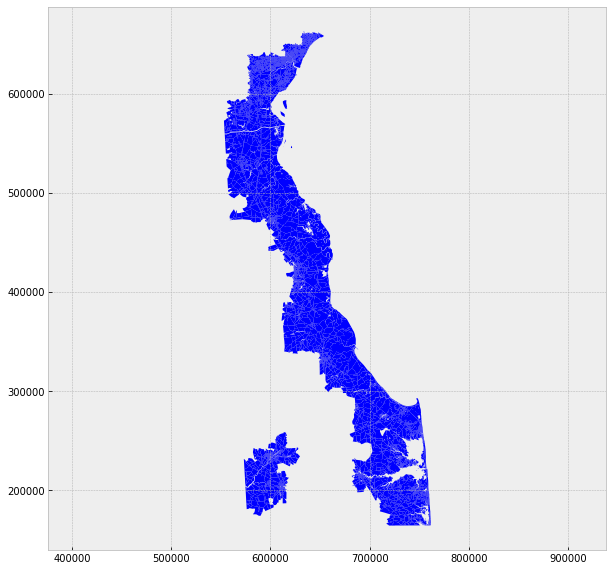

In [ ]:
#@title Map of the "S_CenBlk_Ar"
# Merge counties (Kent + New Castle + Sussex)
kent4 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Kent county/FRD_10001C_Coastal_ShapeFiles_20140502/S_CenBlk_Ar.shp")
ncastle4 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/New castle county/FRD_10003C_Coastal_ShapeFiles_20140516/S_CenBlk_Ar.shp")
sussex4 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Sussex county/FRD_10005C_Coastal_ShapeFiles_20140509/S_CenBlk_Ar.shp")
fnames4 = [kent4, ncastle4, sussex4]
scenblkar = pd.concat(fnames4)

# Plot 
fig, ax = plt.subplots(figsize=[10,10])
scenblkar.plot(ax=ax)
ax.axis("equal")

In [ ]:
scenblkar.head()

,CEN_BLK_ID,POPULATION,ARV_BG_TOT,ARV_CN_TOT,ARV_BG_RES,ARV_CN_RES,ARV_BG_COM,ARV_CN_COM,ARV_BG_OTH,ARV_CN_OTH,HUC8_CODE,CASE_NO,VERSION_ID,SOURCE_CIT,Shape_Leng,Shape_Area,geometry
0,100010402021001,74,6598000,3739000,5818000,2910000,619000,619000,161000,210000,02040207,11-03-1392S,2.3.3.2,HAZUS1,2531.333768,291552.552477,"POLYGON ((602466.847 473818.162, 602926.183 47..."
1,100010402021002,51,6468000,5034000,3486000,1745000,2404000,2602000,578000,687000,02040207,11-03-1392S,2.3.3.2,HAZUS1,1978.736857,244202.374002,"POLYGON ((602508.054 473227.984, 602174.778 47..."
2,100010402021003,6,709000,591000,238000,120000,225000,225000,246000,246000,02040207,11-03-1392S,2.3.3.2,HAZUS1,576.656086,21621.496344,"POLYGON ((602777.997 473748.311, 602806.270 47..."
3,100010402021004,51,8164000,7976000,3242000,1622000,92000,92000,4830000,6262000,02040207,11-03-1392S,2.3.3.2,HAZUS1,2314.357610,321357.999437,"POLYGON ((602447.962 472911.222, 602521.745 47..."
4,100010402021005,34,2935000,2403000,1864000,934000,276000,276000,795000,1193000,02040207,11-03-1392S,2.3.3.2,HAZUS1,1993.306730,192985.966430,"POLYGON ((603223.823 473117.236, 603206.931 47..."




*   **OBJECTID**: Object Identifier. Internal Primary Key used by ArcGIS software to
provide unique access to each record. 
*   **SHAPE**: Shape Geometry Field. Internal field used by ArcGIS software to
store the feature geometry.
*   **CEN_BLK_ID**: This field should be populated with the Census Block identifier. 
*   **POPULATION**: Population Count for the Census Block. 
*   **ARV_BG_TOT**: Asset Replacement Value of Buildings of All Structure Types.
Obtained from General Building Stock data, in whole dollars. 
*   **ARV_CN_TOT**: Asset Replacement Value of Contents for All Structure Types.
Obtained from General Building Stock data, in whole dollars.  
*   **ARV_BG_RES**: Asset Replacement Value of Residential Buildings. Obtained from
General Building Stock data, in whole dollars.  
*   **ARV_CN_RES**: Asset Replacement Value of Contents for Residential Structures. Obtained from General Building Stock data, in whole dollars.  
*   **ARV_BG_COM**: Asset Replacement Value of Commercial Buildings. Obtained from General Building Stock data, in whole dollars.
*   **ARV_CN_COM**: Asset Replacement Value of Contents for Commercial Structures. Obtained from General Building Stock data, in whole dollars. 
*   **ARV_BG_OTH**: Asset Replacement Value of Buildings of Other Structure Types. Obtained from General Building Stock data, in whole dollars.  
*   **ARV_CN_OTH**: Asset Replacement Value of Contents of Other Structure Types. Obtained from General Building Stock data, in whole dollars.  
*   **HUC8_CODE**:  WBD 8-digit Hydrologic Unit Code for the sub-basin in which the Census Block lies. If a Census Block crosses a HUC-8 boundary,
the field shall be populated with the HUC-8 value in which the
majority of the Census Block lies. 
*   **CASE_NO**: FEMA Case Number. See the CASE_NO field in S_FRD_Proj_Ar
for more detail.  
*   **VERSION_ID**: Version Identifier. Identifies the product version and relates the feature to standards according to which it was created. 
*   **SOURCE_CIT**: Source Citation from L_SOURCE_CIT. See field definition in
L_Source_Cit for more detail.
*   **SHAPE_LENGTH**: Internal field used by ArcGIS software to store the length of the feature’s geometry.
*   **SHAPE_AREA**: Internal field used by ArcGIS software to store the area of the feature’s geometry.   


##**5) S_FRD_Pol_Ar**

**S_FRD_Pol_Ar (Spatial): Location and attributes for political jurisdictions shown on the Flood Insurance Rate Maps (FIRMs) utilized in the Flood Risk Project**  

This polygon feature class is the combination of the **S_Pol_Ar feature class from all FIRM
databases in the project area**. It is required to be populated. There should be **one record
(polygon) per community**. This will necessitate the use of multi-part polygons for noncontiguous community boundaries. The polygon(s) should be clipped at the project
boundary using the S_FRD_Proj_Ar feature class.


(542625.1537640222, 777208.4210794888, 139611.785230479, 684939.3940809531)

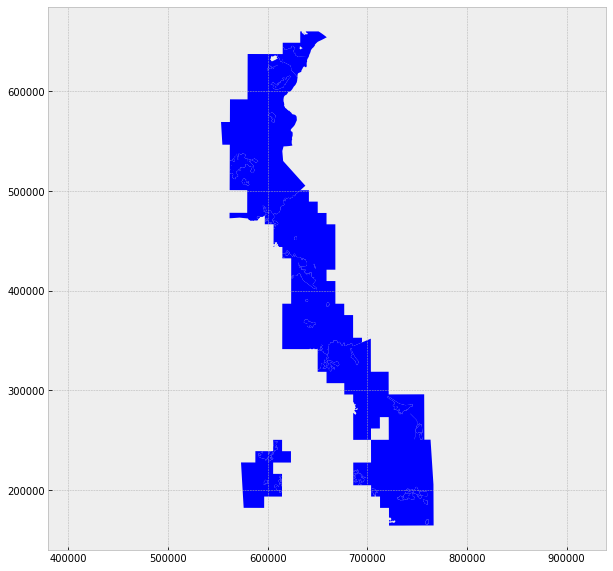

In [ ]:
#@title Map of the "S_FRD_Pol_Ar"
# Merge counties (Kent + New Castle + Sussex)
kent5 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Kent county/FRD_10001C_Coastal_ShapeFiles_20140502/S_FRD_Pol_Ar.shp")
ncastle5 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/New castle county/FRD_10003C_Coastal_ShapeFiles_20140516/S_FRD_Pol_Ar.shp")
sussex5 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Sussex county/FRD_10005C_Coastal_ShapeFiles_20140509/S_FRD_Pol_Ar.shp")
fnames5 = [kent5, ncastle5, sussex5]
sfrdpolar = pd.concat(fnames5)

# Plot 
fig, ax = plt.subplots(figsize=[10,10])
sfrdpolar.plot(ax=ax)
ax.axis("equal")

In [ ]:
sfrdpolar.head()

,POL_AR_ID,DFIRM_ID,CID,POL_NAME1,POL_NAME2,CO_FIPS,ST_FIPS,COMM_NO,POPULATION,TOT_POP,PCT_POP,LND_AR_SM,TOT_LND_AR,PCT_LND_AR,NFIPSTATUS,CRS_RATING,PASTDECLAR,FLD_POLICY,POLICY_COV,HMP_STATUS,HMP_NAME,HMP_EXPIRE,POL_TYP,HUC8_CODE,CASE_NO,VERSION_ID,SOURCE_CIT,Shape_Leng,Shape_Area,D_ST_FIPS,D_NFIPSTAT,D_HMP_STAT,D_POL_TYP,geometry
0,1,10001C,100006,CITY OF DOVER,None,001,10,0006,17441,32247,54.0,14.7,23.3,63.0,T,10,2,170,44127000.0,T,Kent County All Hazard Mitigation Plan,2015-02-16,LOC,02040207,11-03-1392S,2.3.3.2,FIRM2,228917.141610,4.095451e+08,10 - Delaware,True (Yes),True (Yes),Local,"MULTIPOLYGON (((624138.148 413321.263, 624038...."
1,3,10001C,100001,KENT COUNTY,UNINCORPORATED AREAS,001,10,0001,33727,72845,46.0,276.2,750.9,37.0,T,10,2,673,164722600.0,T,Kent County All Hazard Mitigation Plan,2015-02-16,CO,02040207,11-03-1392S,2.3.3.2,FIRM2,951274.670859,7.701129e+09,10 - Delaware,True (Yes),True (Yes),County,"MULTIPOLYGON (((650836.099 337802.056, 650239...."
2,4,10001C,100002,TOWN OF BOWERS,None,001,10,0002,303,303,100.0,0.3,0.3,100.0,T,10,2,117,26223100.0,T,Kent County All Hazard Mitigation Plan,2015-02-16,LOC,02040207,11-03-1392S,2.3.3.2,FIRM2,11898.736711,8.911852e+06,10 - Delaware,True (Yes),True (Yes),Local,"POLYGON ((660311.257 384267.776, 659108.099 38..."
3,5,10001C,100009,TOWN OF FREDERICA,None,001,10,0009,671,671,100.0,1.8,1.8,100.0,T,10,2,10,1819800.0,T,Kent County All Hazard Mitigation Plan,2015-02-16,LOC,02040207,11-03-1392S,2.3.3.2,FIRM2,46054.152960,4.933289e+07,10 - Delaware,True (Yes),True (Yes),Local,"POLYGON ((640170.875 371401.602, 640256.353 37..."
4,6,10001C,100014,TOWN OF LEIPSIC,None,001,10,0014,194,194,100.0,0.3,0.3,100.0,T,10,2,21,4049800.0,T,Kent County All Hazard Mitigation Plan,2015-02-16,LOC,02040207,11-03-1392S,2.3.3.2,FIRM2,11893.889424,9.010632e+06,10 - Delaware,True (Yes),True (Yes),Local,"POLYGON ((628498.168 450951.722, 628431.951 45..."




*   **OBJECTID**: Object Identifier. Internal Primary Key used by ArcGIS software to provide unique access to each record.  
*   **SHAPE**: Shape Geometry Field. Internal field used by ArcGIS software to
store the feature geometry.
*   **POL_AR_ID**: Political Area Identifier. User-defined Primary Key / Unique
Identifier. This field should be sequentially numbered for all records
in the table. This field should be renumbered after appending all the
constituent S_Pol_Ar feature classes to provide uniqueness in this
feature class.
*   **DFIRM_ID**: Regulatory Product Identifier. For a single-jurisdiction Flood Risk Project, the value is composed of the 2-digit State FIPS code and the 4-digit FEMA CID code (e.g., 480001). For a countywide Flood Risk Project, the value is composed of the 2-digit State FIPS code, the 3-digit county FIPS code and the letter “C” (e.g., 48107C). Within each FIRM database, the DFIRM_ID value is identical.  
*   **CID**: Community Identification Number. This is the six-digit community
number assigned by FEMA. If the jurisdiction does not have a community number assigned by FEMA, the CID is created by combining the State FIPS code with the abbreviation contained in the COMM_NO field (i.e., FED, ST, or OTHR), followed by a sequential number (e.g., a tribal land may be 36OTHR01). 
*   **POL_NAME1**: Political Area Name 1 - This is the primary name of the community. This is the area with Floodplain Management Jurisdiction. This
would correspond to the official name of this jurisdiction used by
the FEMA within the NFIP. For unincorporated areas of a county,
this must be the county name (e.g., Montgomery County). For
cities, towns, and villages the name should be of the format “City of
Floodville” or “Town of Waterloo”. In the case where FED, ST, or
OTHR is used in the CID field, the Mapping Partner must enter an
appropriate name describing the political area 
*   **POL_NAME2**: Political Area Name 2. This is the secondary name of the area
shown on FIRM panels. Populated if there is a common name for
an area other than the official jurisdiction name. Also used in
situations where islands, National Parks, National Forests, military
bases, or other area boundaries and/or labels need to be shown on
the FRM. 
*   **CO_FIPS**: County FIPS Code. This is the three-digit county FIPS code. This is a standard numbering system that is used by the Federal
government. Defined in FIPS Pub 6-4.
*   **ST_FIPS**: State FIPS. This is the two-digit code that corresponds to the State FIPS code. This is a standard numbering system that is used by
the Federal government. Defined in FIPS Pub 6-4. Acceptable
values for this field are listed in the D_State_FIPS domain.  
*   **COMM_NO**: Community Number. This is the four-digit number assigned by
FEMA to each community for tracking purposes under the NFIP.
This number can be obtained from the community status book that
can be viewed at www.msc.fema.gov.  
*   **POPULATION**: Population for portion of community in this project area.  
*   **TOT_POP**: Total population of the community.  
*   **PCT_POP**: Percent of the community’s population in this project area.
*   **LND_AR_SM**: Land Area. Area in square miles of the community in this project area.  
*   **TOT_LND_AR**: Total Land Area. Total land area of the community in square miles. 
*   **PCT_LND_AR**: Percentage Land Area. Percentage of the community’s land area in this project area.  
*   **NFIPSTATUS**: NFIP Status. This is a true/false status field which indicates if the community participates in the NFIP. If the community has been
placed in suspended status, a value of false should be used to
designate that the community is no longer participating.
D_TrueFalse contains valid values for this field. 
*   **CRS_RATING**: FEMA Community Rating System (CRS) Classification for the
community (1 ~ 10).  
*   **PASTDECLAR**: Past Declarations. Number of past Federal flood emergency
declarations. Since declarations are normally made at the county
level, if the portion of the community for this project is in that
county, then that declaration would apply in tallying the declarations
for the community. The data in this field should not be aggregated
to larger political areas because of the potential for counting the
same declaration multiple times. 
*   **FLD_POLICY**: Flood Policies. Number of flood insurance policies for this portion of the community in the project area.  
*   **POLICY_COV**: Flood Policy Coverage. Dollar amount of flood insurance coverage for this portion of the community in the project area. 
*   **HMP_STATUS**: HMP Status . This is a true/false status field indicating if the
community participates in a FEMA approved Hazard Mitigation
Plan. D_TrueFalse contains valid values for this field. 
*   **HMP_NAME**: Name of the Hazard Mitigation Plan in which the community
participates. 
*   **HMP_EXPIRE**: Expiration date of the Hazard Mitigation Plan in which the
community participates.
*   **POL_TYP**: Political Boundary Type (i.e., Local, County, State, Federal) – Used for symbology on the FRM. 
*   **HUC8_CODE**: WBD 8-digit Hydrologic Unit Code for the sub-basin in which the community lies. If a community is in multiple HUC-8 sub-basins, the sub-basin in which the portion of the community being studied lies shall be used. If the portion of the community being studied is in multiple sub-basins, the sub-basin in which the greatest portion of the community lies shall be used.
*   **CASE_NO**: FEMA Case Number. See the CASE_NO field in S_FRD_Proj_Ar
for more detail
*   **VERSION_ID**: Version Identifier. Identifies the product version and relates the feature to standards according to which it was created. 
*   **SOURCE_CIT**: Source Citation from L_SOURCE_CIT. See field definition in
L_Source_Cit for more detail. See the definition in L_Source_Cit for
additional detail. 
*   **SHAPE_LENGTH**: Internal field used by ArcGIS software to store the area of the feature’s geometry.
*   **SHAPE_AREA**:Internal field used by ArcGIS software to store the area of the feature’s geometry. 


##**6) S_FRD_Proj_Ar**

**S_FRD_Proj_Ar (Spatial): Polygon representing the extents of the Flood Risk Project area** 

This polygon feature class represents the **spatial ‘footprint’ of the project** (or portion of the project if multiple suites of products are created for the project). It is required to be populated. The single polygon that ‘best’ represents the project area should be used. These features shall be multi-part polygons to support non-contiguous Physical Map Revision (PMR) project footprints. This feature class is used to clip other feature classes delivered in the FRD.

(532927.4550328162, 786745.5108799433, 134369.9332142048, 685189.006081728)

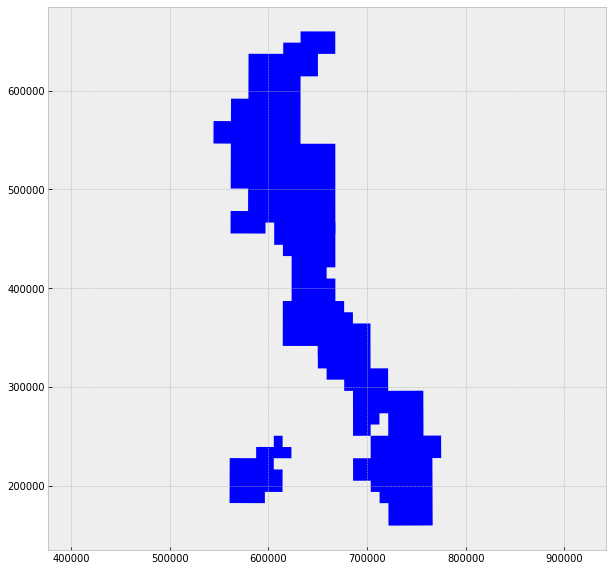

In [ ]:
#@title Map of the "S_FRD_Proj_Ar"
# Merge counties (Kent + New Castle + Sussex)
kent6 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Kent county/FRD_10001C_Coastal_ShapeFiles_20140502/S_FRD_Proj_Ar.shp")
ncastle6 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/New castle county/FRD_10003C_Coastal_ShapeFiles_20140516/S_FRD_Proj_Ar.shp")
sussex6 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Sussex county/FRD_10005C_Coastal_ShapeFiles_20140509/S_FRD_Proj_Ar.shp")
fnames6 = [kent6, ncastle6, sussex6]
sfrdprojar = pd.concat(fnames6)

# Plot 
fig, ax = plt.subplots(figsize=[10,10])
sfrdprojar.plot(ax=ax)
ax.axis("equal")

In [ ]:
sfrdprojar.head()

,CASE_NO,PROJ_NM,H_DATUM,V_DATUM,PROJECTION,PROJ_ZONE,PROJ_UNIT,V_UNITS,META_NM,HAZUS_VER,CENSUS,HUC8_CODE,VERSION_ID,SOURCE_CIT,Shape_Leng,Shape_Area,D_H_DAT,D_V_DATUM,D_PRJCTN,D_PRJUNIT,D_V_UNITS,geometry
0,11-03-1392S,"Kent County, Delaware Coastal Study",NAD83,NAVD88,0700,None,USFT,USFT,FRD_11031392S_metadata.xml,2.1,2000,02040207,2.3.3.2,STUDY1,5.719878e+05,8.879355e+09,North American Datum 1983,North American Vertical Datum 1988,"STATE PLANE TRANSVERSE MERCATOR, DELAWARE ZONE",US SURVEY FEET,U.S. Survey Feet,"POLYGON ((641442.745 500781.979, 641436.205 48..."
0,11-03-1393S,"NEW CASTLE COUNTY, DELAWARE COASTAL STUDY",NAD83,NAVD88,0700,None,USFT,FT,10003C_Coastal_FRD_metadata.xml,2.1,2000,MULTI,2.3.3.2,STUDY1,8.307422e+05,1.595986e+10,North American Datum 1983,North American Vertical Datum 1988,"STATE PLANE TRANSVERSE MERCATOR, DELAWARE ZONE",US SURVEY FEET,Feet,"POLYGON ((638355.479 660147.242, 641535.051 66..."
0,11-03-1394S,SUSSEX COUNTY DE COASTAL STUDY,NSRS07,NAVD88,GCS,None,DECDEG,USFT,10005C_Coastal_FRD_metadata.xml,2.1,2000,MULTI,2.3.3.2,STUDY1,1.055709e+06,1.502491e+10,NAD83 (NSRS2007),North American Vertical Datum 1988,GEOGRAPHIC COORDINATE SYSTEM,DECIMAL DEGREES,U.S. Survey Feet,"MULTIPOLYGON (((614538.405 250407.216, 614520...."


 

*   **OBJECTID**: Object Identifier. Internal Primary Key used by ArcGIS software to provide unique access to each record.   
*   **SHAPE**: Shape Geometry Field. Internal field used by ArcGIS software to
store the feature geometry.  
*   **CASE_NO**: FEMA Case Number. See the CASE_NO field in the S_FRD_Proj_Ar feature class for a more detailed description. The FEMA case number is an alphanumeric identifier assigned to this project which is generated by the MIP. An example of a FEMA case number for a Flood Risk Project is 06-03-0002S, which is of the format YY-RR-####A. The YY represent the last two digits of the year, the RR is the FEMA Region, #### is a sequential number, and A is an alphabetic suffix, which is usually S for studies. The case number shall be entered into the field in this format, including hyphens.  
*   **PROJ_NM**: Project Name (e.g., Watershed, USA). 
*   **H_DATUM**: Horizontal Datum used for all feature classes and rasters used in the project. Normally this would be NAD83 [1986]. D_Horiz_Datum contains valid values for this field.  
*   **V_DATUM**: Vertical Datum used for all feature classes and rasters used in the project. Normally this would be NAVD88. D_V_Datum contains valid values for this field. 
*   **PROJECTION**: Projection used for all feature classes in project. ormally this would be GCS. D_Projection contains valid values for this field.   
*   **PROJ_ZONE**: Projection Zone for the PROJECTION defined above, if applicable. Otherwise, use a null value. Generally this would only be used for
UTM zones (i.e., 01, 02, ...). State Plane Zones are already included as part of the PROJECTION field. 
*   **PROJ_UNIT**: Projection Unit for the PROJECTION defined above. Normally this would be Decimal Degrees (DECDEG) for FRDs where the vector data is in un-projected GCS.  
*   **V_UNITS**: Vertical Units for rasters, elevations stored in attributes, etc.,normally US Survey Feet (USFT). D_Length Units contains valid values for this field.  
*   **META_NM**: Metadata filename (e.g., FRD_YRR1234S_metadata.xml).  
*   **HAZUS_VER**: Hazus Version. The version of Hazus used in the risk assessments (e.g., ‘MR4’ or ‘MR5’). 
*   **CENSUS**: Year of Census data used (e.g., 2000, 2010, etc.) for the Hazus
analysis.  
*   **HUC8_CODE**: WBD 8-digit Hydrologic Unit Code for the sub-basin in which the project lies. If the project area spans multiple HUCs (e.g., large coastal study), populate this field with ‘MULTI’.  
*   **VERSION_ID**: Version Identifier. Identifies the product version and relates the feature to standards according to which it was created.  
*   **SOURCE_CIT**: Source Citation from L_SOURCE_CIT. See field definition in
L_Source_Cit for more detail. 
*   **SHAPE_LENGTH**: Internal field used by ArcGIS software to store the length of the feature’s geometry. 
*   **SHAPE_AREA**: Internal field used by ArcGIS software to store the area of the feature’s geometry. 


##**7) S_FRM_Callout_Ln**

**S_FRM_Callout_Ln: Represents the leaders on the FRM for callouts** 

This polyline feature class is used to display the **callout/leader lines on the FRM**. The line must be digitized from a centroid of the callout box to the geographic feature being highlighted by the callout box. This feature class must be populated when using callout images on the FRM. 

(-872654.6987086716,
 1175645.9666896793,
 -116074.42916706316,
 1760572.3619544145)

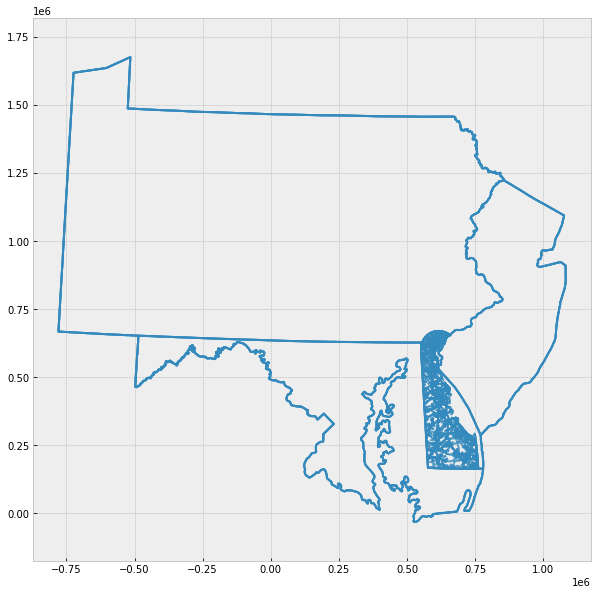

In [ ]:
#@title Map of the "S_FRM_Callout_Ln"
# Merge counties (Kent + New Castle + Sussex)
kent7 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Kent county/FRD_10001C_Coastal_ShapeFiles_20140502/S_FRM_Callout_Ln.shp")
ncastle7 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/New castle county/FRD_10003C_Coastal_ShapeFiles_20140516/S_FRM_Callout_Ln.shp")
sussex7 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Sussex county/FRD_10005C_Coastal_ShapeFiles_20140509/S_FRM_Callout_Ln.shp")
fnames7 = [kent7, ncastle7, sussex7]
sfrmclm = pd.concat(fnames3)

# Plot 
fig, ax = plt.subplots(figsize=[10,10])
sfrmclm.plot(ax=ax)
ax.axis("equal")

In [ ]:
sfrmclm.head()

,CART_LN_ID,F_TYPE,F_CODE,NAME,HWY_NUM,HUC8_CODE,CASE_NO,VERSION_ID,SOURCE_CIT,SHAPE_Leng,D_F_TYPE,D_F_CODE,geometry
0,1,200,300,State Highway 11,11,02060002,11-03-1392S,2.3.3.2,FIRM2,14686.014127,Transportation,State Highways,"LINESTRING (571999.890 425743.142, 572042.757 ..."
1,2,200,300,State Highway 302,302,02060005,11-03-1392S,2.3.3.2,FIRM2,29.724568,Transportation,State Highways,"LINESTRING (562257.636 416572.444, 562282.392 ..."
2,3,200,300,State Highway 317,317,02060005,11-03-1392S,2.3.3.2,FIRM2,2.347261,Transportation,State Highways,"LINESTRING (567553.384 326279.894, 567551.063 ..."
3,4,200,300,State Highway 1,1,02040207,11-03-1392S,2.3.3.2,FIRM2,204712.705233,Transportation,State Highways,"MULTILINESTRING ((657173.279 337205.792, 65680..."
4,5,200,300,State Highway 10,10,02040207,11-03-1392S,2.3.3.2,FIRM2,84757.113816,Transportation,State Highways,"MULTILINESTRING ((604550.072 394162.757, 60485..."


 

*   **OBJECTID**: Object Identifier. Internal Primary Key used by ArcGIS software to provide unique access to each record.  
*   **SHAPE**: Shape Geometry Field. Internal field used by ArcGIS software to
store the feature geometry.
*   **CALLOUT_ID**: Callout Identifier. User-defined Primary Key / Unique Identifier. This field should be sequentially numbered for all records in the table. 
*   **IMG_TITLE**: Image Title. Title for placement with the callout box. 
*   **IMG_HEIGHT**: Image Height. Height of the callout image depicted in inches on the map. 
*   **IMG_WIDTH**: Image Width. Width of the callout image depicted in inches on the map.
*   **IMG_CPTION**: Image Caption. Caption to be placed under the image. 
*   **IMG_BINARY**: Image Binary. The binary formatted image being depicted within the callout box. This image is stored as a managed raster as an attribute of the feature class. 
*   **CASE_NO**: FEMA Case Number. See the CASE_NO field in S_FRD_Proj_Ar for more detail. 
*   **VERSION_ID**: Version Identifier. Identifies the product version and relates the feature to standards according to which it was created. 
*   **SOURCE_CIT**: Source Citation from L_SOURCE_CIT. See field definition in
L_Source_Cit for more detail.
*   **SHAPE_LENGTH**: Internal field used by ArcGIS software to store the length of the feature’s geometry.


##**8) S_HUC_Ar**

**S_HUC_Ar: Hydrologic Unit Code (HUC) boundaries in and adjacent to the Flood Risk Project area**

This polygon feature class depicts the **watersheds in and around the project area**. This feature class has sub-types by the level of hydrologic unit (i.e., 8, 10, 12 or 14) and using DIGITS as the sub-type field. It is required to be populated. The watershed boundaries delivered in this feature class should be based on the Watershed Boundary Dataset (WBD), which is a companion dataset to the National Hydrography Dataset (NHD).

(349500.5942461945, 977844.8533688106, -114579.81836035885, 848298.2600462963)

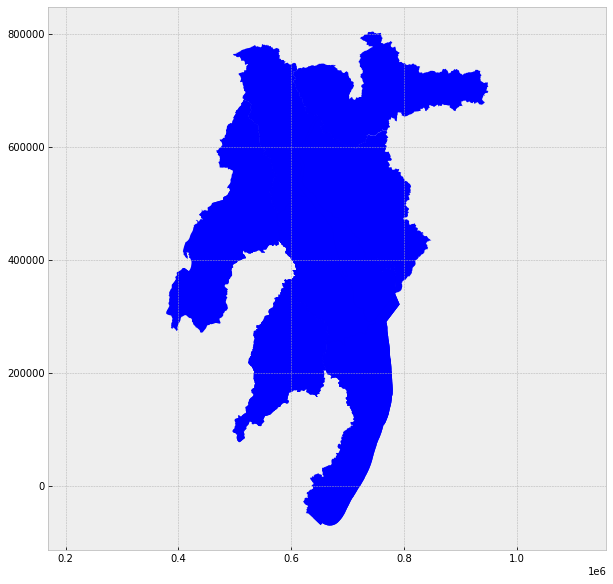

In [ ]:
#@title Map of the "S_HUC_Ar"
# Merge counties (Kent + New Castle + Sussex)
kent8 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Kent county/FRD_10001C_Coastal_ShapeFiles_20140502/S_HUC_Ar.shp")
ncastle8 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/New castle county/FRD_10003C_Coastal_ShapeFiles_20140516/S_HUC_Ar.shp")
sussex8 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Sussex county/FRD_10005C_Coastal_ShapeFiles_20140509/S_HUC_Ar.shp")
fnames8 = [kent8, ncastle8, sussex8]
shucar = pd.concat(fnames8)

# Plot 
fig, ax = plt.subplots(figsize=[10,10])
shucar.plot(ax=ax)
ax.axis("equal")

In [ ]:
shucar.head()

,HUC_CODE,HUC_NAME,DIGITS,CASE_NO,VERSION_ID,SOURCE_CIT,Shape_Leng,Shape_Area,geometry,d_DIGITS
0,02040207,Broadkill-Smyrna,8,11-03-1392S,2.3.3.2,BASE1,1.008275e+06,2.116934e+10,"POLYGON ((612528.771 516339.950, 612633.191 51...",NaN
1,02040204,Delaware Bay,8,11-03-1392S,2.3.3.2,BASE1,1.101531e+06,1.155549e+10,"POLYGON ((651139.740 651852.510, 650949.300 65...",NaN
2,0204020701,Smyrna River-Delaware Bay,10,11-03-1392S,2.3.3.2,BASE2,2.530187e+05,2.073784e+09,"POLYGON ((613726.609 514573.993, 613883.399 51...",NaN
3,0204020703,Saint Jones River,10,11-03-1392S,2.3.3.2,BASE2,3.021191e+05,2.455281e+09,"POLYGON ((605371.215 441750.033, 605644.929 44...",NaN
4,0204020704,Murderkill River-Delaware Bay,10,11-03-1392S,2.3.3.2,BASE2,4.601249e+05,3.676655e+09,"POLYGON ((686105.704 400177.627, 686280.677 39...",NaN


 

*   **OBJECTID**: Object Identifier. Internal Primary Key used by ArcGIS software to provide unique access to each record. 
*   **SHAPE**: Shape Geometry Field. Internal field used by ArcGIS software to
store the feature geometry. 
*   **HUC_CODE**: HUC Identifier (Primary Key). This should be the HUC identifier assigned by WBD. 
*   **HUC_NAME**: Name of basin / sub-basin from WBD. 
*   **DIGITS**: Number of digits in HUC-Code (8, 10, 12, or 14). 
*   **CASE_NO**: FEMA Case Number. See the CASE_NO field in S_FRD_Proj_Ar
for more detail. 
*   **VERSION_ID**: Version Identifier. Identifies the product version and relates the feature to standards according to which it was created. 
*   **SOURCE_CIT**: Source Citation from L_SOURCE_CIT. See field definition in
L_Source_Cit for more detail. 
*   **SHAPE_LENGTH**: Internal field used by ArcGIS software to store the length of the feature’s geometry. 
*   **SHAPE_AREA**: Internal field used by ArcGIS software to store the area of the feature’s geometry. 

In [ ]:
fema = pd.read_csv("https://www.fema.gov/api/open/v1/OpenFemaDataSets.csv")
fema.head()

,identifier,name,title,description,distribution,webService,dataDictionary,keyword,modified,publisher,contactPoint,mbox,accessLevel,landingPage,temporal,api,version,bureauCode,programCode,accessLevelComment,accessUrl,format,license,spatial,theme,dataQuality,accrualPeriodicity,language,primaryITInvestmentUII,references,issued,systemOfRecords,deprecated,deprecatedComment,updateFrequency,hash,lastRefresh,id
0,openfema-1,PublicAssistanceFundedProjectsSummaries,Public Assistance (PA) Funded Project Summaries,FEMA provides supplemental Federal disaster gr...,https://www.fema.gov/api/open/v1/PublicAssista...,https://www.fema.gov/api/open/v1/PublicAssista...,https://www.fema.gov/openfema-dataset-public-a...,"public, assistance, disaster, grant, funding, ...",2019-05-30T04:00:00.000Z,Federal Emergency Management Agency,OpenFEMA,openfema@fema.gov,public,https://www.fema.gov/public-assistance-local-s...,NaN,0,1,024:70,024:039,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,openfema-26,FemaWebDeclarationAreas,OpenFEMA Dataset: FEMA Web Declaration Areas - V1,This data set contains general information on ...,https://www.fema.gov/api/open/v1/FemaWebDeclar...,https://www.fema.gov/api/open/v1/FemaWebDeclar...,https://www.fema.gov/openfema-dataset-fema-web...,"disaster, declaration, fema website",2019-09-26T04:00:00.000Z,Federal Emergency Management Agency,OpenFEMA,openfema@fema.gov,public,https://www.fema.gov/disasters,NaN,0,1,024:70,024:039,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,openfema-28,HazardMitigationAssistanceMitigatedProperties,Hazard Mitigation Assistance Mitigated Properties,This dataset contains the properties that were...,https://www.fema.gov/api/open/v1/HazardMitigat...,https://www.fema.gov/api/open/v1/HazardMitigat...,https://www.fema.gov/openfema-dataset-hazard-m...,"hazard, mitigation, disaster, property, projec...",NaN,Federal Emergency Management Agency,OpenFEMA,openfema@fema.gov,public,https://www.fema.gov/hazard-mitigation-assistance,NaN,0,1,024:70,024:039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/30/2020,New version of data set came out,NaN,NaN,NaN,NaN
3,openfema-36,FemaRegions,FEMA Regions,Provides the list of FEMA Regions. The datase...,https://www.fema.gov/api/open/v1/FemaRegions.c...,https://www.fema.gov/api/open/v1/FemaRegions,https://www.fema.gov/openfema-dataset-FEMA-Reg...,NaN,NaN,Federal Emergency Management Agency,OpenFEMA,openfema@fema.gov,public,NaN,NaN,0,1,024:70,024:039,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,openfema-33,MissionAssignments,Mission Assignments,1.1 What is the data in the submission?\n\nMis...,https://www.fema.gov/api/open/v1/MissionAssign...,https://www.fema.gov/api/open/v1/MissionAssign...,https://www.fema.gov/openfema-dataset-mission-...,"Mission Assignments, Financial Obligations, Di...",NaN,Federal Emergency Management Agency,OpenFEMA,openfema@fema.gov,public,https://www.fema.gov/office-response-and-recovery,5/10/2000,0,1,024:70,024:039,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,Outdated material and since we migrated to an ...,NaN,NaN,NaN,NaN
